In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import camelot

# Read and Prepare Data

In [18]:
data = pd.read_csv("./data/data_corona_varianten.txt",
            infer_datetime_format=True,
            delimiter=" ")

In [19]:
data['sum']=data.sum(axis=1)

In [20]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,sum
0,"08.02.2021,16:00",51,106,151,179,181,210,106,43,41,13,1081
1,"09.02.2021,16:00",56,117,178,206,206,244,127,50,45,17,1246
2,"10.02.2021,16:00",61,127,191,202,213,236,119,43,30,10,1232
3,"11.02.2021,16:00",66,141,212,223,243,262,126,53,34,10,1370
4,"12.02.2021,16:00",76,168,241,253,281,312,139,56,38,11,1575
5,"13.02.2021,16:00",83,185,266,278,306,351,151,66,48,13,1747
6,"14.02.2021,16:00",87,192,279,292,310,360,161,66,48,14,1809
7,"15.02.2021,16:00",90,202,303,312,332,375,173,76,53,16,1932


In [21]:
data["Timestamp"] = pd.to_datetime(data.Timestamp, format="%d.%m.%Y,%H:%M")

In [22]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,sum
0,2021-02-08 16:00:00,51,106,151,179,181,210,106,43,41,13,1081
1,2021-02-09 16:00:00,56,117,178,206,206,244,127,50,45,17,1246
2,2021-02-10 16:00:00,61,127,191,202,213,236,119,43,30,10,1232
3,2021-02-11 16:00:00,66,141,212,223,243,262,126,53,34,10,1370
4,2021-02-12 16:00:00,76,168,241,253,281,312,139,56,38,11,1575
5,2021-02-13 16:00:00,83,185,266,278,306,351,151,66,48,13,1747
6,2021-02-14 16:00:00,87,192,279,292,310,360,161,66,48,14,1809
7,2021-02-15 16:00:00,90,202,303,312,332,375,173,76,53,16,1932


In [23]:
data.keys()

Index(['Timestamp', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+', 'sum'],
      dtype='object')

In [24]:
age_groups = data.keys()[1:-1]

In [25]:
age_groups

Index(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80-89', '90+'],
      dtype='object')

In [26]:
Y_MAX = data[age_groups].max(axis=0).max()
print(Y_MAX)

375


Δdata

In [27]:
Δdata = data.diff()

In [35]:
Δdata["Timestamp"] = data["Timestamp"]

In [36]:
Δdata

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,sum
0,2021-02-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-09 16:00:00,5.0,11.0,27.0,27.0,25.0,34.0,21.0,7.0,4.0,4.0,165.0
2,2021-02-10 16:00:00,5.0,10.0,13.0,-4.0,7.0,-8.0,-8.0,-7.0,-15.0,-7.0,-14.0
3,2021-02-11 16:00:00,5.0,14.0,21.0,21.0,30.0,26.0,7.0,10.0,4.0,0.0,138.0
4,2021-02-12 16:00:00,10.0,27.0,29.0,30.0,38.0,50.0,13.0,3.0,4.0,1.0,205.0
5,2021-02-13 16:00:00,7.0,17.0,25.0,25.0,25.0,39.0,12.0,10.0,10.0,2.0,172.0
6,2021-02-14 16:00:00,4.0,7.0,13.0,14.0,4.0,9.0,10.0,0.0,0.0,1.0,62.0
7,2021-02-15 16:00:00,3.0,10.0,24.0,20.0,22.0,15.0,12.0,10.0,5.0,2.0,123.0


# Plotting

## for each timestep

0


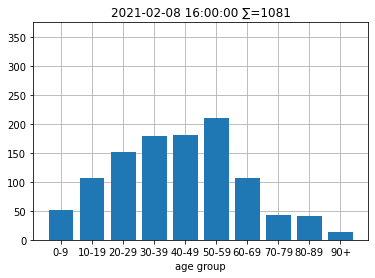

1


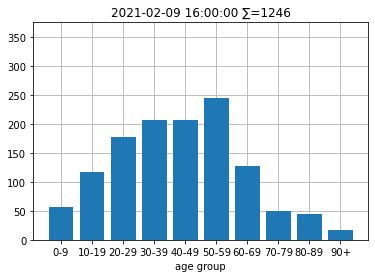

2


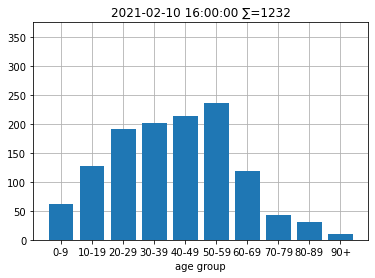

3


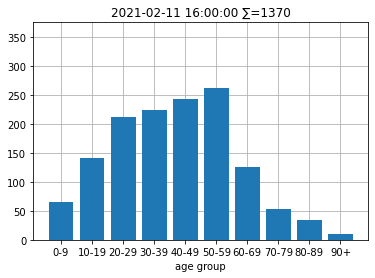

4


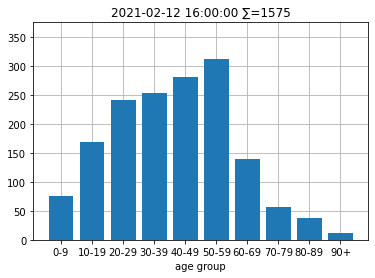

5


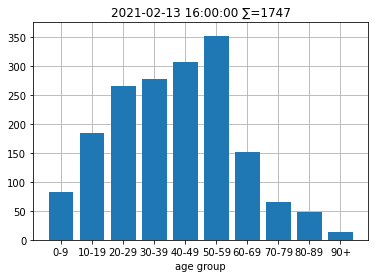

6


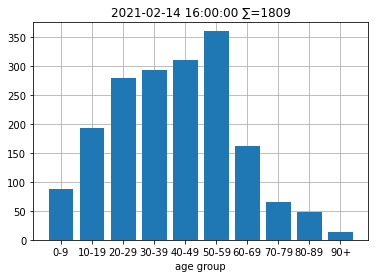

7


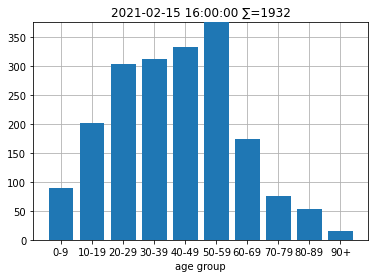

In [30]:
for i in range(data.index[-1]+1):
    print(i)
    cur_height = np.array(data.loc[i][age_groups])
    plt.bar(age_groups, 
            height=cur_height,
           zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(0.,Y_MAX)
    plt.title(str(data.loc[i][0]) + f" ∑={data['sum'][i]}")
    plt.show()
    plt.close()

Plot des Zuwachses

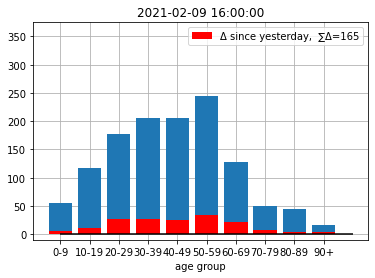

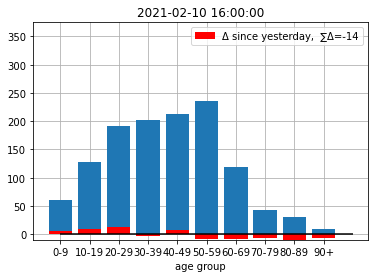

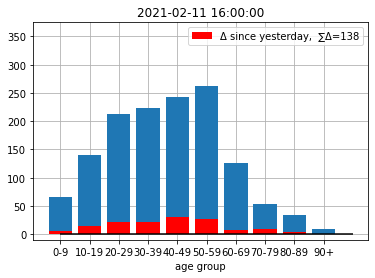

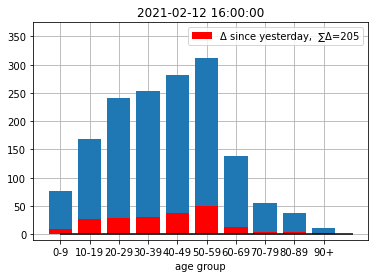

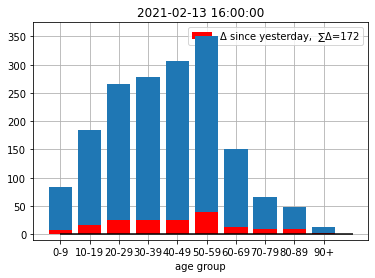

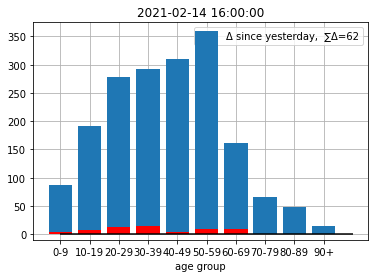

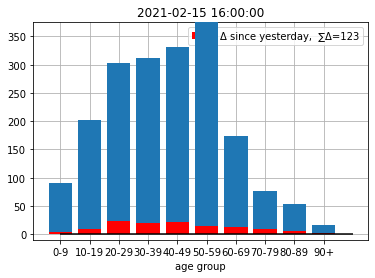

In [31]:
for i in np.arange(start=1, stop=data.index[-1]+1):
    # print(i)
    cur_height = np.array(data.loc[i][age_groups])
    # print(cur_height)
    prev_height = np.array(data.loc[i-1][age_groups])
    # print(prev_height)
    Δ = cur_height - prev_height
    # print(bottom)
    sum_delta = Δ.sum()

    
    # plot current height
    plt.bar(age_groups, 
            height=cur_height,
           zorder=995)
    # plot change since last time
    plt.bar(age_groups, 
            height=Δ,
            bottom=0,
            color='red',
           zorder=998,
           label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
    plt.hlines(0,0,10,  colors='k', zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(-10.,Y_MAX)
    plt.title(data.loc[i][0])
    plt.legend(loc='best')
    plt.show()
    plt.close()

## Evolution over Time

In [32]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,sum
0,2021-02-08 16:00:00,51,106,151,179,181,210,106,43,41,13,1081
1,2021-02-09 16:00:00,56,117,178,206,206,244,127,50,45,17,1246
2,2021-02-10 16:00:00,61,127,191,202,213,236,119,43,30,10,1232
3,2021-02-11 16:00:00,66,141,212,223,243,262,126,53,34,10,1370
4,2021-02-12 16:00:00,76,168,241,253,281,312,139,56,38,11,1575
5,2021-02-13 16:00:00,83,185,266,278,306,351,151,66,48,13,1747
6,2021-02-14 16:00:00,87,192,279,292,310,360,161,66,48,14,1809
7,2021-02-15 16:00:00,90,202,303,312,332,375,173,76,53,16,1932


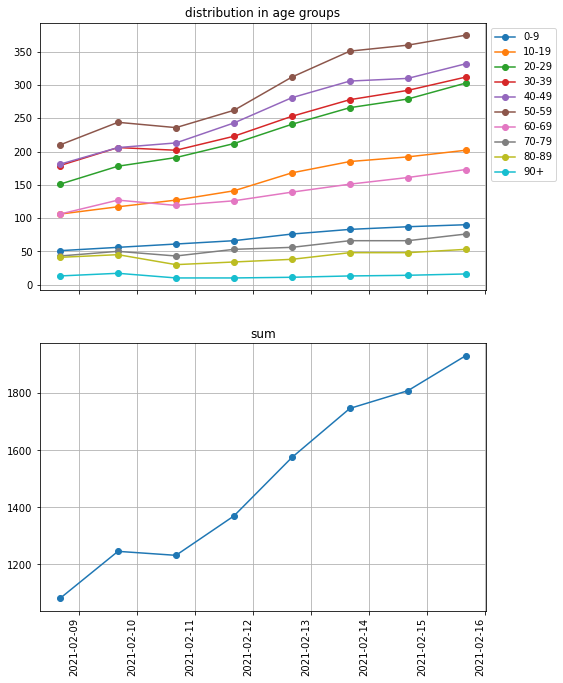

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))
for cur_age in age_groups:
    age_plot = ax[0].plot(data["Timestamp"],
                          data[cur_age],
                          "o-",
                          label=cur_age,
                          )

ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].grid(True)
ax[0].title.set_text("distribution in age groups")

# plot the sum
ax[1].plot(data["Timestamp"],
          data["sum"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("sum")
fig.autofmt_xdate(rotation=90)

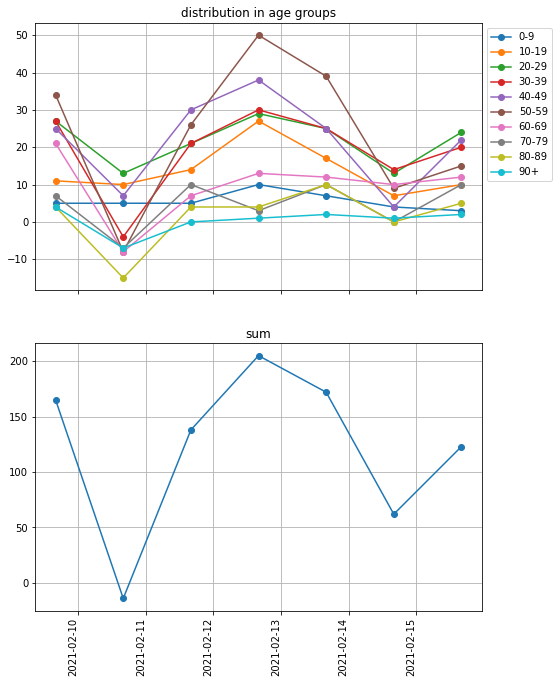

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))
for cur_age in age_groups:
    age_plot = ax[0].plot(Δdata["Timestamp"],
                          Δdata[cur_age],
                          "o-",
                          label=cur_age,
                          )

ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].grid(True)
ax[0].title.set_text("distribution in age groups")

# plot the sum
ax[1].plot(Δdata["Timestamp"],
          Δdata["sum"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("sum")
fig.autofmt_xdate(rotation=90)

In [ ]:
for i in np.arange(start=1, stop=data.index[-1]+1):
    # print(i)
    cur_height = np.array(data.loc[i][age_groups])
    # print(cur_height)
    prev_height = np.array(data.loc[i-1][age_groups])
    # print(prev_height)
    Δ = cur_height - prev_height
    # print(bottom)
    sum_delta = Δ.sum()

    # plot change since last time
    plt.bar(age_groups, 
            height=Δ,
            bottom=0,
            color='red',
           zorder=998,
           label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
    plt.hlines(0,0,10,  colors='k', zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(-10.,Y_MAX)
    plt.title(data.loc[i][0])
    plt.legend(loc='best')
    plt.show()
    plt.close()

read from PDF

In [ ]:
pdfobject=open('210208_COVID_Tagesbericht_LGA.pdf','rb')

In [ ]:
pdf=pypdf.PdfFileReader(pdfobject)

In [ ]:
pdf.pages

In [ ]:
tables = camelot.read_pdf('210208_COVID_Tagesbericht_LGA.pdf')

In [ ]:
!gs